In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from generate_triple_data import par, simulate

%matplotlib inline

In [16]:
data = simulate(par, stim_N=10)

simulating  401.0
stimulating  10
connecting  J_BC 2.0


In [17]:
t_stop = data['status']['time']
spiketrains = [s['times'] for s in data['spiketrains']]
names = ['A', 'B', 'C']

In [22]:
A_spikes, B_spikes, C_spikes = spiketrains

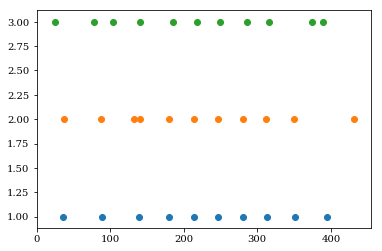

In [27]:
plt.figure()
plt.scatter(A_spikes, 1.*np.ones(A_spikes.shape[0]))
plt.scatter(B_spikes, 2.*np.ones(B_spikes.shape[0]))
plt.scatter(C_spikes, 3.*np.ones(B_spikes.shape[0]))
plt.show()

In [35]:
delta_t = 3.
sigma = 2.

In [36]:
pdf_A = np.zeros((C_spikes.shape[0], A_spikes.shape[0]))
for i in range(pdf_A.shape[1]):
    pdf_A[:,i] = norm.pdf(C_spikes, loc=A_spikes[i]+delta_t, scale=sigma) / pdf_A.shape[1]
pdf_A = np.sum(pdf_A, axis=1)    

pdf_B = np.zeros((C_spikes.shape[0], B_spikes.shape[0]))
for i in range(pdf_B.shape[1]):
    pdf_B[:,i] = norm.pdf(C_spikes, loc=B_spikes[i]+delta_t, scale=sigma) / pdf_B.shape[1]
pdf_B = np.sum(pdf_B, axis=1)    

In [38]:
pdf_B

array([5.20071132e-15, 1.11028856e-10, 4.36428790e-11, 8.97513064e-03,
       1.15481389e-02, 1.63875892e-02, 1.75758235e-02, 5.88716344e-03,
       1.73358098e-02, 1.04601396e-29, 1.36215932e-77])

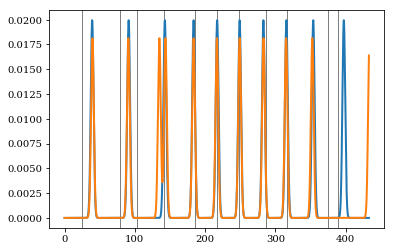

In [40]:
x_plot = np.linspace(0, t_stop, 10000, endpoint=True)
pdf_A = np.zeros((x_plot.shape[0], A_spikes.shape[0]))
for i in range(pdf_A.shape[1]):
    pdf_A[:,i] = norm.pdf(x_plot, loc=A_spikes[i]+delta_t, scale=sigma) / pdf_A.shape[1]
pdf_A = np.sum(pdf_A, axis=1)  

pdf_B = np.zeros((x_plot.shape[0], B_spikes.shape[0]))
for i in range(pdf_B.shape[1]):
    pdf_B[:,i] = norm.pdf(x_plot, loc=B_spikes[i]+delta_t, scale=sigma) / pdf_B.shape[1]
pdf_B = np.sum(pdf_B, axis=1) 


plt.figure()
for s in C_spikes:
    plt.axvline(x=s, c='black', lw=0.5)
plt.plot(x_plot, pdf_A, lw=2)
plt.plot(x_plot, pdf_B, lw=2)
plt.show()

In [41]:
llh = lambda x: -np.sum(np.log( x*pdf_A + (1-x)*pdf_B))
llh = np.vectorize(llh)

pynest:1: RuntimeWarning: invalid value encountered in log


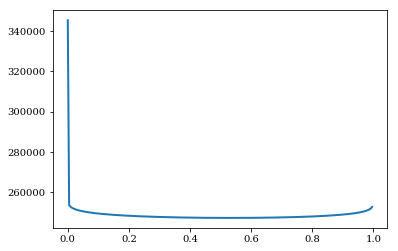

In [47]:
# x_best = optimize.minimize_scalar(llh, bounds=(0., 1.))

x_plot = np.linspace(0, t_stop, 100000, endpoint=True)
y_plot = llh(x_plot)

plt.figure()
plt.plot(x_plot,y_plot, lw=2)
# plt.axvline(x = x_best, lw=2)
plt.show()

In [50]:
x_plot[np.nanargmin(y_plot)]

0.5325953259532595